<a href="https://colab.research.google.com/github/bishr-ab/ReinforcementLearning/blob/main/coursework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt # Graphical library
from sklearn.metrics import mean_squared_error # Mean-squared error function

# Coursework 1 :
See pdf for instructions. 

In [2]:
# WARNING: fill in these two functions that will be used by the auto-marking script
# [Action required]

def get_CID():
  return "01704293" # Return your CID (add 0 at the beginning to ensure it is 8 digits long)

def get_login():
  return "ba619" # Return your short imperial login

## Helper class

In [3]:
# This class is used ONLY for graphics
# YOU DO NOT NEED to understand it to work on this coursework

class GraphicsMaze(object):

  def __init__(self, shape, locations, default_reward, obstacle_locs, absorbing_locs, absorbing_rewards, absorbing):

    self.shape = shape
    self.locations = locations
    self.absorbing = absorbing

    # Walls
    self.walls = np.zeros(self.shape)
    for ob in obstacle_locs:
      self.walls[ob] = 20

    # Rewards
    self.rewarders = np.ones(self.shape) * default_reward
    for i, rew in enumerate(absorbing_locs):
      self.rewarders[rew] = 10 if absorbing_rewards[i] > 0 else -10

    # Print the map to show it
    self.paint_maps()

  def paint_maps(self):
    """
    Print the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders)
    plt.show()

  def paint_state(self, state):
    """
    Print one state on the Maze topology (obstacles, absorbing states and rewards)
    input: /
    output: /
    """
    states = np.zeros(self.shape)
    states[state] = 30
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders + states)
    plt.show()

  def draw_deterministic_policy(self, Policy):
    """
    Draw a deterministic policy
    input: Policy {np.array} -- policy to draw (should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, action in enumerate(Policy):
      if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
        continue
      arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
      action_arrow = arrows[action] # Take the corresponding action
      location = self.locations[state] # Compute its location on graph
      plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
    plt.show()

  def draw_policy(self, Policy):
    """
    Draw a policy (draw an arrow in the most probable direction)
    input: Policy {np.array} -- policy to draw as probability
    output: /
    """
    deterministic_policy = np.array([np.argmax(Policy[row,:]) for row in range(Policy.shape[0])])
    self.draw_deterministic_policy(deterministic_policy)

  def draw_value(self, Value):
    """
    Draw a policy value
    input: Value {np.array} -- policy values to draw
    output: /
    """
    plt.figure(figsize=(15,10))
    plt.imshow(self.walls + self.rewarders) # Create the graph of the Maze
    for state, value in enumerate(Value):
      if(self.absorbing[0, state]): # If it is an absorbing state, don't plot any value
        continue
      location = self.locations[state] # Compute the value location on graph
      plt.text(location[1], location[0], round(value,2), ha='center', va='center') # Place it on graph
    plt.show()

  def draw_deterministic_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple deterministic policies
    input: Policies {np.array of np.array} -- array of policies to draw (each should be an array of values between 0 and 3 (actions))
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Policies)): # Go through all policies
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each policy
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, action in enumerate(Policies[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any action
          continue
        arrows = [r"$\uparrow$",r"$\rightarrow$", r"$\downarrow$", r"$\leftarrow$"] # List of arrows corresponding to each possible action
        action_arrow = arrows[action] # Take the corresponding action
        location = self.locations[state] # Compute its location on graph
        plt.text(location[1], location[0], action_arrow, ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graph given as argument
    plt.show()

  def draw_policy_grid(self, Policies, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policies (draw an arrow in the most probable direction)
    input: Policy {np.array} -- array of policies to draw as probability
    output: /
    """
    deterministic_policies = np.array([[np.argmax(Policy[row,:]) for row in range(Policy.shape[0])] for Policy in Policies])
    self.draw_deterministic_policy_grid(deterministic_policies, title, n_columns, n_lines)

  def draw_value_grid(self, Values, title, n_columns, n_lines):
    """
    Draw a grid representing multiple policy values
    input: Values {np.array of np.array} -- array of policy values to draw
    output: /
    """
    plt.figure(figsize=(20,8))
    for subplot in range (len(Values)): # Go through all values
      ax = plt.subplot(n_columns, n_lines, subplot+1) # Create a subplot for each value
      ax.imshow(self.walls+self.rewarders) # Create the graph of the Maze
      for state, value in enumerate(Values[subplot]):
        if(self.absorbing[0,state]): # If it is an absorbing state, don't plot any value
          continue
        location = self.locations[state] # Compute the value location on graph
        plt.text(location[1], location[0], round(value,1), ha='center', va='center') # Place it on graph
      ax.title.set_text(title[subplot]) # Set the title for the graoh given as argument
    plt.show()


## Maze class

In [4]:
# This class define the Maze environment

class Maze(object):

  # DONE init 
  def __init__(self):
    """
    Maze initialisation.
    input: /
    output: /
    """
    
    y = int(get_CID()[-1:]) # Returns 3 which is last character of my CID
    z = int(get_CID()[-2:-1]) # Returns 9 which is penultimate character of my CID

    
    # Properties set from the CID
    self._prob_success = 0.8 + 0.02*(9-y) # float
    self._gamma = 0.8 + 0.02*y # float
    self._goal = z%4 # integer (0 for R0, 1 for R1, 2 for R2, 3 for R3) Gives 1 as 9%4 = 1

    # Build the maze
    self._build_maze()
                              

  # Functions used to build the Maze environment 
  # You DO NOT NEED to modify them
  def _build_maze(self):
    """
    Maze initialisation.
    input: /
    output: /
    """

    # Properties of the maze
    self._shape = (13, 10)
    self._obstacle_locs = [
                          (1,0), (1,1), (1,2), (1,3), (1,4), (1,7), (1,8), (1,9), \
                          (2,1), (2,2), (2,3), (2,7), \
                          (3,1), (3,2), (3,3), (3,7), \
                          (4,1), (4,7), \
                          (5,1), (5,7), \
                          (6,5), (6,6), (6,7), \
                          (8,0), \
                          (9,0), (9,1), (9,2), (9,6), (9,7), (9,8), (9,9), \
                          (10,0)
                         ] # Location of obstacles
    self._absorbing_locs = [(2,0), (2,9), (10,1), (12,9)] # Location of absorbing states
    self._absorbing_rewards = [ (500 if (i == self._goal) else -50) for i in range (4) ] #Reward of absorbing states
    self._starting_locs = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)] # Location of starting states 
    self._default_reward = -1 # Reward for each action performs in the environment
    self._max_t = 500 # Max number of steps in the environment

    # Actions
    self._action_size = 4
    self._direction_names = ['N','E','S','W'] # Direction 0 is 'N', 1 is 'E' and so on
        
    # States
    self._locations = []
    for i in range (self._shape[0]):
      for j in range (self._shape[1]):
        loc = (i,j) 
        # Adding the state to locations if it is no obstacle
        if self._is_location(loc):
          self._locations.append(loc)
    self._state_size = len(self._locations)

    # Neighbours - each line is a state, ranked by state-number, each column is a direction (N, E, S, W)
    self._neighbours = np.zeros((self._state_size, 4)) 
    
    for state in range(self._state_size):
      loc = self._get_loc_from_state(state)

      # North
      neighbour = (loc[0]-1, loc[1]) # North neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('N')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('N')] = state

      # East
      neighbour = (loc[0], loc[1]+1) # East neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('E')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('E')] = state

      # South
      neighbour = (loc[0]+1, loc[1]) # South neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('S')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('S')] = state

      # West
      neighbour = (loc[0], loc[1]-1) # West neighbours location
      if self._is_location(neighbour):
        self._neighbours[state][self._direction_names.index('W')] = self._get_state_from_loc(neighbour)
      else: # If there is no neighbour in this direction, coming back to current state
        self._neighbours[state][self._direction_names.index('W')] = state

    # Absorbing
    self._absorbing = np.zeros((1, self._state_size))
    for a in self._absorbing_locs:
      absorbing_state = self._get_state_from_loc(a)
      self._absorbing[0, absorbing_state] = 1

    # Transition matrix
    self._T = np.zeros((self._state_size, self._state_size, self._action_size)) # Empty matrix of domension S*S*A
    for action in range(self._action_size):
      for outcome in range(4): # For each direction (N, E, S, W)
        # The agent has prob_success probability to go in the correct direction
        if action == outcome:
          prob = 1 - 3.0 * ((1.0 - self._prob_success) / 3.0) # (theoritically equal to self.prob_success but avoid rounding error and garanty a sum of 1)
        # Equal probability to go into one of the other directions
        else:
          prob = (1.0 - self._prob_success) / 3.0
          
        # Write this probability in the transition matrix
        for prior_state in range(self._state_size):
          # If absorbing state, probability of 0 to go to any other states
          if not self._absorbing[0, prior_state]:
            post_state = self._neighbours[prior_state, outcome] # Post state number
            post_state = int(post_state) # Transform in integer to avoid error
            self._T[prior_state, post_state, action] += prob

    # Reward matrix
    self._R = np.ones((self._state_size, self._state_size, self._action_size)) # Matrix filled with 1
    self._R = self._default_reward * self._R # Set default_reward everywhere
    for i in range(len(self._absorbing_rewards)): # Set absorbing states rewards
      post_state = self._get_state_from_loc(self._absorbing_locs[i])
      self._R[:,post_state,:] = self._absorbing_rewards[i]

    # Creating the graphical Maze world
    self._graphics = GraphicsMaze(self._shape, self._locations, self._default_reward, self._obstacle_locs, self._absorbing_locs, self._absorbing_rewards, self._absorbing)
    
    # Reset the environment
    self.reset()


  def _is_location(self, loc):
    """
    Is the location a valid state (not out of Maze and not an obstacle)
    input: loc {tuple} -- location of the state
    output: _ {bool} -- is the location a valid state
    """
    if (loc[0] < 0 or loc[1] < 0 or loc[0] > self._shape[0]-1 or loc[1] > self._shape[1]-1):
      return False
    elif (loc in self._obstacle_locs):
      return False
    else:
      return True


  def _get_state_from_loc(self, loc):
    """
    Get the state number corresponding to a given location
    input: loc {tuple} -- location of the state
    output: index {int} -- corresponding state number
    """
    return self._locations.index(tuple(loc))


  def _get_loc_from_state(self, state):
    """
    Get the state number corresponding to a given location
    input: index {int} -- state number
    output: loc {tuple} -- corresponding location
    """
    return self._locations[state]

  # Getter functions used only for DP agents
  # You DO NOT NEED to modify them
  def get_T(self):
    return self._T

  def get_R(self):
    return self._R

  def get_absorbing(self):
    return self._absorbing

  # Getter functions used for DP, MC and TD agents
  # You DO NOT NEED to modify them
  def get_graphics(self):
    return self._graphics

  def get_action_size(self):
    return self._action_size

  def get_state_size(self):
    return self._state_size

  def get_gamma(self):
    return self._gamma

  def get_max_t(self):
    return self._max_t # Added this myself

  # Functions used to perform episodes in the Maze environment
  def reset(self):
    """
    Reset the environment state to one of the possible starting states
    input: /
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """
    self._t = 0
    self._state = self._get_state_from_loc(self._starting_locs[random.randrange(len(self._starting_locs))])
    self._reward = 0
    self._done = False
    return self._t, self._state, self._reward, self._done

  def step(self, action):
    """
    Perform an action in the environment
    input: action {int} -- action to perform
    output: 
      - t {int} -- current timestep
      - state {int} -- current state of the envionment
      - reward {int} -- current reward
      - done {bool} -- True if reach a terminal state / 0 otherwise
    """

    # If environment already finished, print an error
    if self._done or self._absorbing[0, self._state]:
      print("Please reset the environment")
      return self._t, self._state, self._reward, self._done

    # Drawing a random number used for probaility of next state
    probability_success = random.uniform(0,1)

    # Look for the first possible next states (so get a reachable state even if probability_success = 0)
    new_state = 0
    while self._T[self._state, new_state, action] == 0: 
      new_state += 1
    assert self._T[self._state, new_state, action] != 0, "Selected initial state should be probability 0, something might be wrong in the environment."

    # Find the first state for which probability of occurence matches the random value
    total_probability = self._T[self._state, new_state, action]
    while (total_probability < probability_success) and (new_state < self._state_size-1):
     new_state += 1
     total_probability += self._T[self._state, new_state, action]
    assert self._T[self._state, new_state, action] != 0, "Selected state should be probability 0, something might be wrong in the environment."
    
    # Setting new t, state, reward and done
    self._t += 1
    self._reward = self._R[self._state, new_state, action]
    self._done = self._absorbing[0, new_state] or self._t > self._max_t
    self._state = new_state
    return self._t, self._state, self._reward, self._done

## DP Agent

In [5]:
# This class defines the Dynamic Programming agent 

class DP_agent(object):

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Dynamic Programming
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - V {np.array} -- Corresponding value function 
    """
    
    # Initialisation (can be edited)
    policy = np.zeros((env.get_state_size(), env.get_action_size())) # Initialise policy 
    V = np.zeros(env.get_state_size()) # Initialisation of value function

   

    #policy,V,episodes = self.policyIteration(policy, env, V)
    policy, V  = self.valueIteration(env)
    

    return policy, V

  def policyEvaluation(self, policy, env, V, threshold = 0.0001): # Policy evaluation

             
    delta = 2*threshold # setting delta
    VNew = np.copy(V)

    assert (policy.shape[0] == env.get_state_size()) and (policy.shape[1] == env.get_action_size()), "The dimensions of the policy are not valid."
    assert (env.get_gamma() <=1) and (env.get_gamma() >= 0), "Discount factor should be in [0, 1]."

    while delta>threshold: # Apply policy evaluation algo
      for priorState in range(env.get_state_size()):
        if not env.get_absorbing()[0,priorState]:
          tempV = 0 # Need temp var to store V 
          for action in range(env.get_action_size()): #Go through the possible actions of the agent
            tempQ = 0 # Need temp var to store Q 
            for postState in range(env.get_state_size()):  #Look at states whihc we're transitioning to
              tempQ += (env.get_T()[priorState, postState, action]*(env.get_R()[priorState, postState, action]+(env.get_gamma()*V[postState]))) #Apply Bellman
            tempV += policy[priorState, action]*tempQ 
          VNew[priorState] = tempV
      delta = max(abs(V-VNew)) # Element wise subtraction and then return the maximum value of delta 
      V = np.copy(VNew)

    return V 
    

  def policyIteration(self, policy, env, V): #Option 1: Policy iteration using policy evaluation

    policy = np.zeros((env.get_state_size(), env.get_action_size())) # Matrix of S*A of 0s
    policy[:, :] = 1/(env.get_action_size()) # Initialise policy to 1/(actionsize) to let agent make a decision
    policyStable = False # Condition to stop the main loop
    episodes = 0

    while (not policyStable) and (episodes < 500): # This is to make sure we dont cross 500 episodes
      V = self.policyEvaluation(policy, env, V, threshold = 0.0001)

      policyStable = True # Toggle true as per step 3 in policy improvement
      for priorState in range(env.get_state_size()):
        if not env.get_absorbing()[0, priorState]: # Check to see if state is absorbing
        # We want to see if a' is a better action than a, so we store the old action to check criteria later:
          oldAction = np.argmax(policy[priorState,:]) # This looks for the index position of greatest value action in policy array
          Q = np.zeros(env.get_action_size()) # Initialise Q to a 4 input vector for NESW 
          for postState in range(env.get_state_size()):
            Q+= env.get_T()[priorState,postState,:]*(env.get_R()[priorState,postState,:]+env.get_gamma()*V[postState])

          newPolicy = np.zeros(env.get_action_size()) # Make this same size as Q 
          newPolicy[np.argmax(Q)] = 1 # This means that index position of maximum action value in Q gets probability 1
          # We also recall by acting greedily, newPolicy = argmax(Q). This is where the equivalence lies. 
          policy[priorState,:] = newPolicy
          if oldAction!=np.argmax(policy[priorState,:]):
            policyStable = False
          #If policy-stable, then while loop breaks, if not, we repeat policy evaluation, which is at top of loop
      episodes+=1 
    return policy, V, episodes

  def valueIteration(self, env): #Value Iteration which is other DP algorithm to obtain optimal value function and policy 
    threshold = 0.0001 # This is our theta 
    delta = threshold # Setting value of delta to go through the first breaking condition
    V = np.zeros(env.get_state_size()) # Initialise values at 0 for each state

    while delta >= threshold:
      delta = 0 # Initialise delta
      # First we look at prior state 

      for priorState in range(env.get_state_size()):
        if not env.get_absorbing()[0,priorState]:
          v = V[priorState]

          # Q value computation:
          Q = np.zeros(env.get_action_size())
          for postState in range(env.get_state_size()):
            Q += env.get_T()[priorState, postState,:] * (env.get_R()[priorState, postState, :] + env.get_gamma() * V[postState]) # Use bellman equation for Q

          V[priorState] = np.max(Q) # Optimal value function

          delta = max(delta, np.abs(v - V[priorState])) # Compute new delta 
    
    policy = np.zeros((env.get_state_size(), env.get_action_size())) # Matrix of S*A of 0s to initialise policy
    #policy[0, 0] = 1/(env.get_action_size()) # Initialise policy to 1/(actionsize) to let agent make a decision


    for priorState in range(env.get_state_size()):
      # Compute the Q value
      Q = np.zeros(env.get_action_size()) #Initialise Q
      for postState in range(env.get_state_size()):
        Q += env.get_T()[priorState, postState,:] * (env.get_R()[priorState, postState, :] + env.get_gamma() * V[postState])
            
      # The action that maximises the Q value gets probability 1, where the position of this action in the column of policy is argmax(Q)
      policy[priorState, np.argmax(Q)] = 1 
    
    return policy, V

  
    

## MC agent

In [6]:
# This class defines the Monte-Carlo agent

class MC_agent(object):
  
  def epsilonGreedy(self,env,Q,epsilon):
    policy = np.ones((env.get_state_size(), env.get_action_size()))*(epsilon/(env.get_action_size()))
    # if policy[state,a*], then a* formula 
    # if policy[state,everything not a*], then a formula 
    # np.argmax(Q, axis = 1) gives array of index positions of row-wise maximum value 
    aStar = np.argmax(Q, axis = 1)
    for state in range(env.get_state_size()):
       policy[state,aStar[state]] = 1-epsilon+(epsilon/env.get_action_size())
    return policy
  
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):

    """
    Solve a given Maze environment using Monte Carlo learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """

    # Initialisation (can be edited)

    Q = np.random.rand(env.get_state_size(), env.get_action_size()) # Q can be some arbitrary value
    V = np.zeros(env.get_state_size())
    values = [V]
    total_rewards = []
    alpha = 0.1 # Increase the learning rate
    epsilon  = 0.1
    policy = self.epsilonGreedy(env, Q, epsilon = epsilon) # Epsilon-greedy assigned to policy
    maxSteps = 500
    episodeCount = 500
     


  # Episodes start from starting locations. 
   #   If I use env.reset(), i reset the episode so the game goes back to the beginning 
    #  env.step(action) gives me time step, state, reward and if its done {bool}
     # Episode finishes when agent reaches terminal state (done == True)

    
    for episode in range(episodeCount):
      timeStep, state, reward, done = env.reset()
      tau = [] # (timestep, state, action). tau = trace
      epRewards = [0, ] # Tally up rewards to append onto total, starting with 0 for being in the same spot
      #stateActionReward = [] # (state, action, reward)
      while (timeStep<maxSteps) and not done:
        action = np.random.choice(env.get_action_size(), size=None, p=policy[state]) # Assign action to random choice = policy of state
        tau.append((timeStep,state,action))
        timeStep, state, reward, done = env.step(action) # Agent takes a step
        epRewards.append(reward) # Add reward for that step
      #  stateActionReward.append((state,action,reward))

      total_rewards.append(np.sum(epRewards)) # Sum up total rewards 

      # Now we find state-action value, taking into account alpha and gamma. This will help us optimise the policy and value fn
      G = 0 # Discounted reward  
      tauReversed = tau[::-1] # Need this as we look into future time steps 
      stateActionReturns = list() # equiv to []

      for t, state, action in tauReversed: # Goes backwards, so G_t = G_{t+1} .. 
        G = G*env.get_gamma() + epRewards[t+1]
        stateActionReturns.append((state,action,G))
      
      for s, a, R in stateActionReturns:
        Q[s, a] = Q[s, a] + alpha*(R - Q[s, a])
      
      policy = self.epsilonGreedy(env, Q, epsilon = epsilon) #Indented to update after every batch
      V = np.zeros(env.get_state_size()) #Initialise V after each ep 
      for state in range(env.get_state_size()):
          V[state] = np.sum(policy[state,:] * Q[state,:])
      values.append(V)

    # Batch learning:
    # Look For each batch of episodes 
      # Look For each episode, and !reset at the start of each episode env.reset()!
        # Returns = np.zeros(statesize, actionsize)
        # episodeStateActionRewards = [(state,action,reward),(state,action,reward),......]
        # While not done:
          #Action taken = random soft epsilon
          # take another step and get the new state,action,reward, 

    
    # Recap: we first use policy evaluation, and then we improve it such that the policy acts greedily wrt to value fn

    return policy, values, total_rewards

## TD agent

In [7]:
# This class define the Temporal-Difference agent

class TD_agent(object):

  def epsilonGreedy(self,env,Q,epsilon):
    policy = np.ones((env.get_state_size(), env.get_action_size()))*(epsilon/(env.get_action_size()))
    aStar = np.argmax(Q, axis = 1)
    for state in range(env.get_state_size()):
        policy[state,aStar[state]] = 1-epsilon+(epsilon/env.get_action_size())
    return policy

  # [Action required]
  # WARNING: make sure this function can be called by the auto-marking script
  def solve(self, env):
    """
    Solve a given Maze environment using Temporal Difference learning
    input: env {Maze object} -- Maze to solve
    output: 
      - policy {np.array} -- Optimal policy found to solve the given Maze environment 
      - values {list of np.array} -- List of successive value functions for each episode 
      - total_rewards {list of float} -- Corresponding list of successive total non-discounted sum of reward for each episode 
    """

    # Initialisation (can be edited)
    Q = np.random.rand(env.get_state_size(), env.get_action_size()) 
    V = np.zeros(env.get_state_size())
    policy = np.zeros((env.get_state_size(), env.get_action_size())) 
    values = [V]
    total_rewards = []
    
    epsilon = 0.1
    alpha = 0.2
    episodeCount = 500
    maxSteps = 500
    policy = self.epsilonGreedy(env, Q, epsilon = epsilon)

    # Q-learning algorithm 
    # For each episode:
      # initalise state, so timeStep, s, reward, done = env.reset() 
      # stateAction = []
      #  while not done and step<500:
        # action = epsilon greedy random
        # append (state,action)
        # timeStep, s, reward, done = env.step(action)


    # Q learning algorithm!!
    for episode in range(episodeCount): # Iterate thru every ep 
      timeStep, s, R, done = env.reset() # Initialise env 
      epRewards = [0, ] # Tally the rewards, initialising to 0 for being in starting state when resetting 
      while not done and (timeStep<maxSteps): # when done, we reach terminal state 
        policy = self.epsilonGreedy(env, Q, epsilon = epsilon) # Initialise policy 
        a = np.random.choice(env.get_action_size(), size = None, p = policy[s]) # Take random action
        timeStep, sDash, R, done = env.step(a)
        Q[s,a] = Q[s,a] + alpha*(R + (env.get_gamma()*np.max(Q[sDash,a]))-Q[s,a])
        epRewards.append(R) # Rewards per episode 
        s = sDash # we are now in sDash, which is our current state s. this will be s in next loop

      total_rewards.append(np.sum(epRewards))
        

       #Initialise V after each ep 
      V = np.zeros(env.get_state_size())
      for state in range(env.get_state_size()): # for loop to calculate value function
          V[state] = np.sum(policy[state,:] * Q[state,:])
      values.append(V)

    
    return policy, values, total_rewards

## Example main

Creating the Maze:



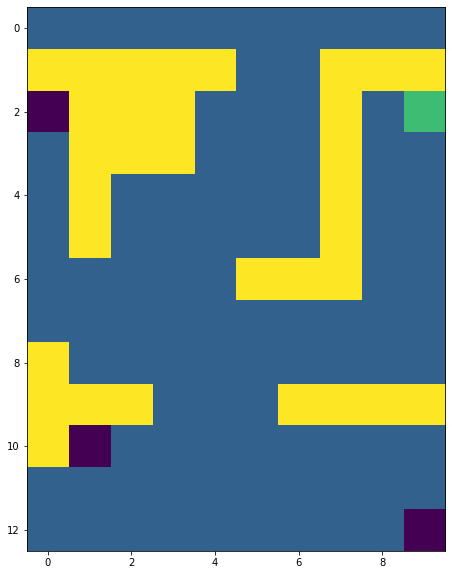

Results of the DP agent:



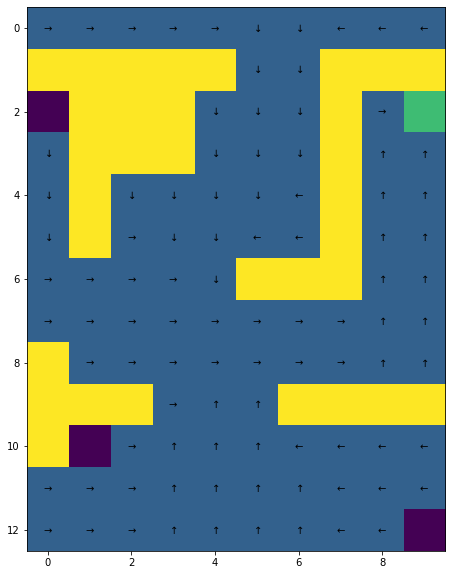

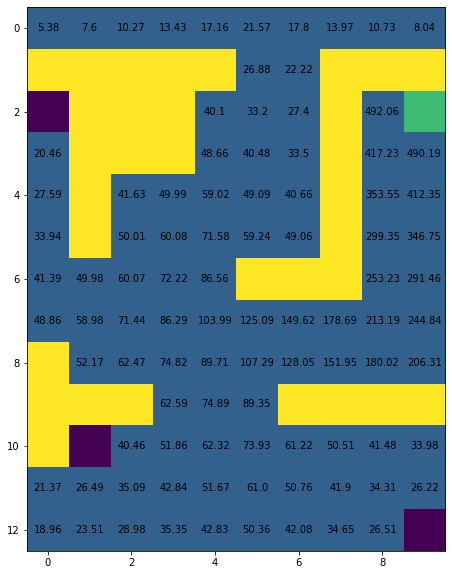

Results of the MC agent:



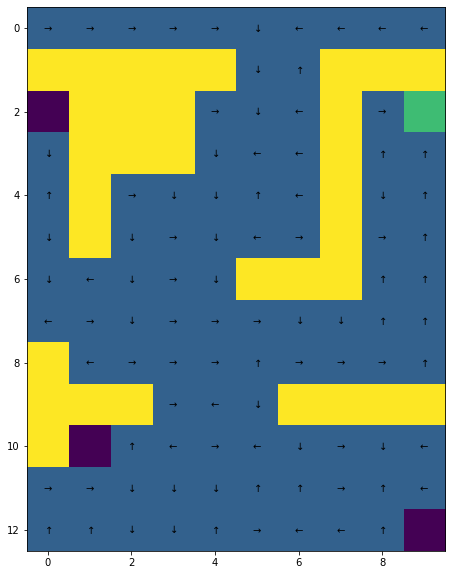

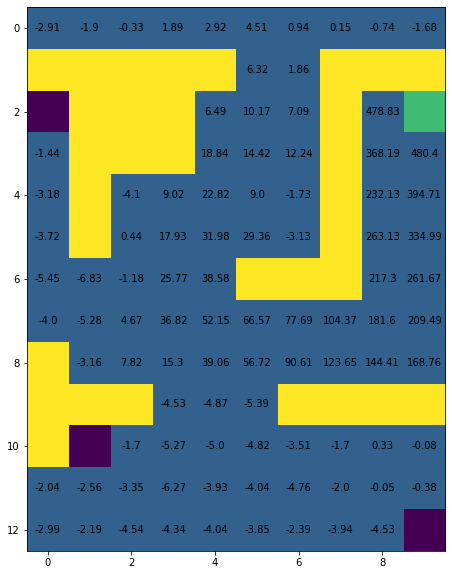

Results of the TD agent:



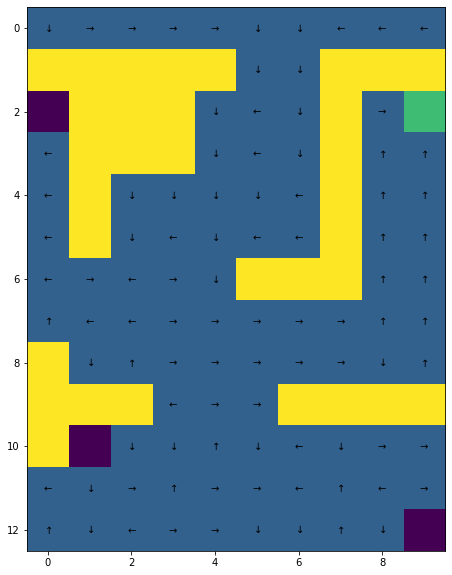

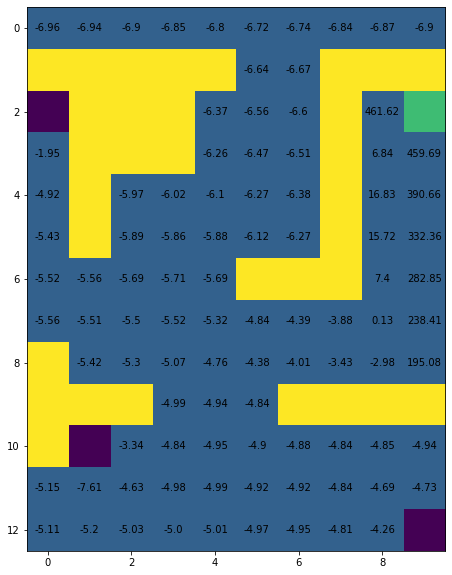

In [8]:
# Example main (can be edited)

### Question 0: Defining the environment

print("Creating the Maze:\n")
maze = Maze()


### Question 1: Dynamic programming

dp_agent = DP_agent()
dp_policy, dp_value = dp_agent.solve(maze)

print("Results of the DP agent:\n")
maze.get_graphics().draw_policy(dp_policy)
maze.get_graphics().draw_value(dp_value)



### Question 2: Monte-Carlo learning


mc_agent = MC_agent()
mc_policy, mc_values, total_rewards = mc_agent.solve(maze)

print("Results of the MC agent:\n")
maze.get_graphics().draw_policy(mc_policy)
maze.get_graphics().draw_value(mc_values[-1])


### Question 3: Temporal-Difference learning

td_agent = TD_agent()
td_policy, td_values, total_rewards = td_agent.solve(maze)

print("Results of the TD agent:\n")
maze.get_graphics().draw_policy(td_policy)
maze.get_graphics().draw_value(td_values[-1])


if __name__ == '__main__':

  replicationNumber = 80
  '''
  # Plot learning curves for MC agent to see performance. 
  replicationsMC = list()
  replicationNumber  = 40 * 2 # 10choose1 * 4choose1 * 2

  for _ in range(replicationNumber):
    _, _, total_rewards = mc_agent.solve(maze)
    replicationsMC.append(total_rewards) # Make list of list of each total_rewards from every simulation 

  #print(len(replicationsMC)) # 5 or the amount of times I replicate 
  #print(len(replicationsMC[3])) # 2000 or the no of episodes 

  # Plot the undiscounted rewards vs the number of episodes
    # This is replicated replicationNumber=80 times, so plot the mean and standard deviation of all those replications. 
    # This can be done by plotting the x and y values, as well as the error bars:

  # total_rewards is a list of values. This'll correspondingly get plotted against the number of values in the list (ep number)

  plt.title("Learning Curve for MC Agent")
  plt.xlabel("Number of Episodes")
  plt.ylabel("Undiscounted Rewards")
  # We wish to plot mean of every episode (go down vertically (through columns) through replications). 
  # We also wish to plot the standard deviation. plt.errorbar bar does this well. 
  plt.errorbar(range(len(replicationsMC[0])),np.mean(replicationsMC, axis = 0), yerr = np.std(replicationsMC, axis = 0), color = 'red', ecolor = "lightcoral") 
  plt.show()
  

  
  # Plot learning curves for MC agent to see performance. 
  replicationsTD = list()
  replicationNumber  = 40 * 2 # 10choose1 * 4choose1 * 2

  for _ in range(replicationNumber):
    _, _, total_rewards = td_agent.solve(maze)
    replicationsTD.append(total_rewards)

  #print(len(replications)) # 5 or the amount of times I replicate 
  #print(len(replications[3])) # 2000 or the no of episodes 

  # Plot the undiscounted rewards vs the number of episodes
    # This is replicated replicationNumber=80 times, so plot the mean and standard deviation of all those replications. 
    # This can be done by plotting the x and y values, as well as the error bars:

  # Same code as MC agent: 
  plt.title("Learning Curve for TD Agent")
  plt.xlabel("Number of Episodes")
  plt.ylabel("Undiscounted Rewards")
  # We wish to plot mean of every episode (go down vertically (through columns) through replications). 
  # We also wish to plot the standard deviation. plt.errorbar bar does this well. 
  plt.errorbar(range(len(replicationsTD[0])),np.mean(replicationsTD, axis = 0), yerr = np.std(replicationsTD, axis = 0), color = 'forestgreen', ecolor = "springgreen") 
  plt.show()
  

  # Question 4: Comparison of Learners

  replicationsMCvsDP_valuesMSE = list()
  replicationsTDvsDP_valuesMSE = list()


  # Question 4.1: Plot MSE of value function against number of episodes 
  
  for _ in range(replicationNumber):
    mcMSEvalueList = []
    tdMSEvalueList = [] 
    _, mc_values, _ = mc_agent.solve(maze)
    _, td_values, _ = td_agent.solve(maze)

    for mcValue in mc_values:
      mcMSEvalueList.append(mean_squared_error(dp_value, mcValue))
    replicationsMCvsDP_valuesMSE.append(mcMSEvalueList)

    for tdValue in td_values:
      tdMSEvalueList.append(mean_squared_error(dp_value, tdValue))
    replicationsTDvsDP_valuesMSE.append(tdMSEvalueList)


  plt.errorbar(range(len(replicationsMCvsDP_valuesMSE[0])), np.mean(replicationsMCvsDP_valuesMSE, axis = 0), yerr = np.std(replicationsMCvsDP_valuesMSE, axis = 0), color = 'red', ecolor = 'lightcoral', label = "Monte-Carlo Agent" )
  plt.errorbar(range(len(replicationsTDvsDP_valuesMSE[0])), np.mean(replicationsTDvsDP_valuesMSE, axis = 0), yerr = np.std(replicationsTDvsDP_valuesMSE, axis = 0), color = 'forestgreen', ecolor = 'springgreen', label = "Temporal Difference Agent" )
  plt.ylabel("Value Function Estimation Error")
  plt.xlabel("Number of Episodes")
  plt.title("Comparison of Value Function Between Model-Free Learners with Dynamic Programming")
  plt.legend()
  plt.show()
  

  # Question 4.3: Plot MSE of value function against total rewards for each episode in scatter plot (so 500 scatters needed for MC and TD each)

  _, td_values, td_total_rewards = td_agent.solve(maze)
  _, mc_values, mc_total_rewards = mc_agent.solve(maze)

  tdMSErewardList = list()
  mcMSErewardList = list()
  

  for tdValue in (td_values): # Equal length so we can just iterate through
    tdMSErewardList.append(mean_squared_error(dp_value, tdValue))
  for mcValue in mc_values:
    mcMSErewardList.append(mean_squared_error(dp_value, mcValue))





  # This technique is called list comprehension and is equivalent to doing:
  #   for Value in values:
    #  valueList.append(mean_squared_error(value1, value2))

  print("length of tc_total_rewards is ",  len(td_total_rewards) , " and length of tcMSErewardsList = " , len(tdMSErewardList))

  
  plt.scatter(td_total_rewards,tdMSErewardList, color = 'forestgreen', label = 'TD Agent', alpha = 1.)
  plt.scatter(mc_total_rewards,mcMSErewardList, color = 'red', label = 'MC Agent', alpha = 0.75)
  plt.legend()
  plt.xlabel("Total non-discounted Sum of Rewards for Each Episode")
  plt.ylabel("Value Function Estimation Error")
  plt.title("Comparison of Value Function With Reward Between Model-Free Learners and Dynamic Programming")
  plt.show()
  '''

